In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline    #render figures inline. 

import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42) 

# Exploratory Data Analysis

In [61]:
# from google.colab import drive
# drive.mount('/content/drive')

In [62]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d")

In [63]:
# dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/Ethiopian-languages-DS/'
# data_dir = dir + 'data/'
# reports_dir = dir + 'reports/' + timestamp + '/'

In [64]:
dir = '../'
data_dir = dir + 'data/'
reports_dir = dir + 'reports/' + timestamp + '/'

In [65]:
import os
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

In [66]:
path = data_dir + 'Amharic News Dataset.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,headline,category,date,views,article,link
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,ፖለቲካ,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,ሀገር አቀፍ ዜና,"Jan 8, 2020",387,አዲስ አበባ፣ ታህሳስ 29፣ 2012 (ኤፍ.ቢ.ሲ) የአሸንዳ፣ ሻደይ፣ አሸ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,ሀገር አቀፍ ዜና,"Mar 4, 2020",634,አዲስ አበባ ፣ የካቲት 25 ፣ 2012 (ኤፍ ቢ ሲ) ባለፉት አምስት ቀና...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,ስፖርት,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የዓለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,ሀገር አቀፍ ዜና,"August 7, 2019",32,አዲስ አበባ፤- “መንገድ ለሰው” በሚል በአዲስ አበባ ከተማ ሲካሄድ የነ...,https://www.press.et/Ama/?p=15606


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [68]:
data.category.value_counts()

ሀገር አቀፍ ዜና    20674
ስፖርት          10411
ፖለቲካ           9325
ዓለም አቀፍ ዜና     6543
ቢዝነስ           3894
መዝናኛ            635
Name: category, dtype: int64

In [69]:
data.category.unique()

array(['ፖለቲካ', 'ሀገር አቀፍ ዜና', 'ስፖርት', 'ዓለም አቀፍ ዜና', 'ቢዝነስ', 'መዝናኛ', nan],
      dtype=object)

Those are:

['Politics', 'Local News', 'Sports', 'International News', 'Business', 'Entertainment']

In [70]:
df = data.copy()
d_replace = {'ፖለቲካ':'Politics', 'ሀገር አቀፍ ዜና':'Local News', 'ስፖርት':'Sports', 'ዓለም አቀፍ ዜና':'International News', 'ቢዝነስ':'Business', 'መዝናኛ':'Entertainment', np.nan:'Others'}
df.category = df.category.map(d_replace)
df.sample(10)

,headline,category,date,views,article,link
28745,ሪፖርት | ኢትዮጵያ ቡና ከድንቅ እንቅስቃሴ ጋር የዓመቱን የመጀመርያ ድል...,Sports,"December 22, 2019",Unknown,በርከት ያሉ የግብ ማግባት ሙከራዎች በተስተናገዱበት የ4ኛ ሳምንት የኢትዮ...,https://soccerethiopia.net/football/53248
34387,ኢትዮጵያ ንግድ ባንክ ከ ቅዱስ ጊዮርጊስ – ቀጥታ የፅሁፍ ስርጭት,Sports,"June 14, 2016",Unknown,\n72′ ተስፋዬ አለባቸው\nመደበኛው የጨዋታ ክፍለ ጊዜ ተጠናቆ 4 ደቂቃ...,https://soccerethiopia.net/football/12693
12232,የድምጻዊ ሃጫሉ ሁንዴሳ የቀብር ሥነ ሥርዓት አምቦ ውስጥ ተፈጸመ,Local News,2 ሀምሌ 2020,Unknown,የድምጻዊ ሃጫሉ ሁንዴሳ የቀብር ሥነ ሥርዓት በአምቦ ከተማ በሚገኘው የገዳ...,https://www.bbc.com/amharic/news-53260523
21064,የኮሮና ቫይረስ ማረጋገጫ ምርመራ በአገር ውስጥ ተጀመረ,Local News,12 February 2020,Unknown,የኖቭል ኮሮና ቫይረስ ማረጋገጫ ኬሚካል (ሪኤጀንት) ማስገባቱንና ምርመራ ...,https://www.ethiopianreporter.com/article/18005
11626,“የዋጋ ንረቱ መፍትሔ ሊፈለግለት ይገባል” ሸማቾች,Local News,"September 12, 2019",155,“የዋጋ ንረቱ መፍትሔ ሊፈለግለት ይገባል” ሸማቾችህጋዊ የንግድ ስርዓቱን ...,https://www.amharaweb.com/%e1%8b%a8%e1%8b%8b%e...
20287,መከላከያ ሚኒስቴር አቶ ስብሃት ነጋ ከእነ ባለቤታቸው በቁጥጥር ሥር መዋላ...,Politics,10 January 2021,Unknown,ሕወሓት በ1967 ዓ.ም. ሲመሠረት አንደኛው መሥራችና ከፍተኛ አመራር የነ...,https://www.ethiopianreporter.com/article/20968
51418,ሳዑዲ አረቢያ ሴቶች ያለማንም ረዳት እንዲጓዙ ፈቀደች,Local News,"August 2, 2019",Unknown,ባለፈው አርብ ይፋ የተደረገው አዲሱ ሕግ፤ እድሜያቸው ...,https://waltainfo.com/am/34122/
28069,“ቡድኑን በአንበልነት መምራቴ እና በቡና መለያ የመጀመርያ ሐት-ትሪክ መስ...,Sports,"March 7, 2020",Unknown,አቡበከር ናስር በኢትዮጵያ ቡና መለያ የመጀመርያውን ሐት-ትሪክ ስለመስራቱ...,https://soccerethiopia.net/football/57061
15417,የውጭ ጉዳይ ሚኒስትር ዴኤታ አምባሳደር ሬድዋን ሁሴን ከፖርቹጋል አቻቸው ...,Local News,"Sep 14, 2020",190,አዲስ አበባ፣ መስከረም 4፣ 2013 (ኤፍ.ቢ.ሲ) የኢፌዲሪ የውጭ ጉዳይ ...,https://www.fanabc.com/%e1%8b%a8%e1%8b%8d%e1%8...
34973,ሽመልስ በቀለ በፔትሮጀት የመሰለፍ ዕድል ተነፍጎታል,Sports,"January 17, 2016",Unknown,ከሃገር ውጪ ለሚጫወቱ ኢትዮጵያዊያን ተጫዋቾችን የውድድር ዘመኑ የሚመች ...,https://soccerethiopia.net/football/4952


In [71]:
cat_labels = df.category.unique()
cat_labels

array(['Politics', 'Local News', 'Sports', 'International News',
       'Business', 'Entertainment', 'Others'], dtype=object)

In [72]:
data = df.copy()    # back to normal dataframe

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51483 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


In [74]:
data.isna().sum()

headline    13
category     0
date         0
views        0
article      0
link         0
dtype: int64

In [75]:
# data = data.dropna(subset=['article'])

In [76]:
data.category.value_counts()

Local News            20674
Sports                10411
Politics               9325
International News     6543
Business               3894
Entertainment           635
Others                    1
Name: category, dtype: int64

In [77]:
data['link'].value_counts()

https://amharic.voanews.com//a/amb-tibor-nagy-in-addis-ababa-on-sudan-06-14-19/4960197.html                                                                                                                                                                                                                                                 3
https://amharic.voanews.com//a/covid-africa/5535902.html                                                                                                                                                                                                                                                                                    3
https://amharic.voanews.com//a/looking-ahead-Ethiopian-renaissance-dam-weaspire-with-voa-alula-kebede-june-2020/5470822.html                                                                                                                                                                                                                

In [78]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
44810,በመዲናዋ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና ለማስጀመር የ20 ቢሊ...,Politics,"September 14, 2017",Unknown,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,https://waltainfo.com/am/29360/,302
18329,አሸንዳ፣ ሻደይ፣ አሸንድዬ፣ ሶለል፣ ማሪያና ዓይኒ ዋሪ በዓል በዩኔስኮ አ...,Local News,"Jan 8, 2020",387,አዲስ አበባ፣ ታህሳስ 29፣ 2012 (ኤፍ.ቢ.ሲ) የአሸንዳ፣ ሻደይ፣ አሸ...,https://www.fanabc.com/%e1%8b%a8%e1%8a%a0%e1%8...,165
17644,ግምታዊ ዋጋቸው ከ31 ነጥብ 6 ሚሊየን ብር በላይ የሆኑ የኮንትሮባንድ ዕ...,Local News,"Mar 4, 2020",634,አዲስ አበባ ፣ የካቲት 25 ፣ 2012 (ኤፍ ቢ ሲ) ባለፉት አምስት ቀና...,https://www.fanabc.com/%e1%8c%8d%e1%88%9d%e1%8...,102
32773,​ባምላክ ተሰማ የዓለም ዋንጫ ለመምራት እጩ ከሆኑ ዳኞች ውስጥ ተካተተ,Sports,"November 19, 2017",Unknown,ሩሲያ በ2018 ለምታስተናግደው የዓለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,https://soccerethiopia.net/football/31318,143
4139,“መንገድ ለሰው” መርሐ ግብር በየሳምንቱ እንደሚካሄድ ተገለፀ,Local News,"August 7, 2019",32,አዲስ አበባ፤- “መንገድ ለሰው” በሚል በአዲስ አበባ ከተማ ሲካሄድ የነ...,https://www.press.et/Ama/?p=15606,193


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51483 entries, 44810 to 15795
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51483 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
 6   word_len  51483 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [80]:
data.word_len.mean()

248.9586853912942

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [81]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
    return rep48


In [82]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [83]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [84]:
n_data = data[['article','category']]
n_data.head()


,article,category
44810,በአዲስ አበባ የተጀመሩ የጋራ መኖሪያ ቤቶችን ግንባታ ለማጠናቀቅና አዳዲስ...,Politics
18329,አዲስ አበባ ታህሳስ 29 2012 ኤፍቢሲ የአሸንዳ ሻደይ አሸንድዬ ሶለል ...,Local News
17644,አዲስ አበባ የካቲት 25 2012 ኤፍ ቢ ሲ ባለፉት አምስት ቀናት ግም...,Local News
32773,ሩሲያ በ2018 ለምታስተናግደው የአለም ዋንጫ ፊፋ ጨዋታዎችን ሊመሩ የሚች...,Sports
4139,አዲስ አበባ መንገድ ለሰው በሚል በአዲስ አበባ ከተማ ሲካሄድ የነበረው ...,Local News


In [85]:
text,label = data['article'].values , data['category'].values

In [86]:
# n_data.head(5).to_csv('table.csv')

## Model Evaluation

In [87]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [88]:
def print_eval(title, model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import confusion_matrix, classification_report

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['Politics', 'Local News', 'Local News', ..., 'Local News',
        'Sports', 'Local News'], dtype=object))

In [90]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [92]:
method_name = 'GaussianNB'

In [93]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6279498883169855

In [94]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

GaussianNB
[[ 580   10   61   84   11   55    1]
 [   8  103    7    3    0    2    4]
 [  19   23 1187   32   10   42   10]
 [ 641  175 1000 1591   33  579   53]
 [   0    0    0    0    0    0    0]
 [ 234   26  329  219   23 1044    3]
 [   3   26   49   18   36    2 1961]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.39      0.72      0.51       802
     Entertainment       0.28      0.81      0.42       127
International News       0.45      0.90      0.60      1323
        Local News       0.82      0.39      0.53      4072
            Others       0.00      0.00      0.00         0
          Politics       0.61      0.56      0.58      1878
            Sports       0.97      0.94      0.95      2095

          accuracy                           0.63     10297
         macro avg       0.50      0.62      0.51     10297
      weighted avg       0.72      0.63      0.63     10297

Train_Set
                    precision    recall 

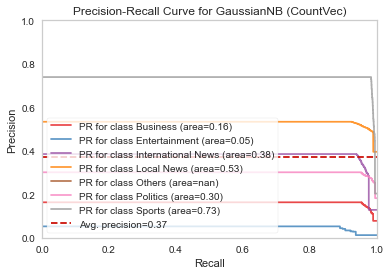

In [95]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    classes=classifier.classes_,
    title="Precision-Recall Curve for GaussianNB (CountVec)", 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

We will specify a feature to increase success rate.

In [96]:
feature = 'Business'

In [97]:
def store_result(title, feature, y, y_pred, visualizer):
  d = {"Model":[], "F1_score": [], "Recall_score":[], "Prec_Recall_score":[]}
  d["Model"].append(title)

  f1_ = f1_score(y, y_pred, labels=[feature], average=None)[0]
  d["F1_score"].append(f1_)

  recall_ = recall_score(y, y_pred, labels=[feature], average=None)[0]
  d["Recall_score"].append(recall_)

  d["Prec_Recall_score"].append(visualizer.score_[feature])

  df = pd.DataFrame(d)

  filename = reports_dir + 'Results' + '.csv'

  import os
  if not os.path.isfile(filename):
    df.to_csv(filename, header=d.keys(), index=False)  
  else:         
    df.to_csv(filename, mode='a', header=False, index=False)

In [98]:
def read_results():
    return pd.read_csv(reports_dir, index=False)

In [99]:
# all_models = {"Model":[], "F1_score": [], "Recall_score":[], "Prec_Recall_score":[]}
store_result(method_name, feature, y_test, y_pred, viz)

## Multinomial NB

In [100]:
method_name = 'Multinomial NB'

In [101]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7069049237642032

In [102]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Multinomial NB
[[ 564   15   19  137    0   67    0]
 [   3  114    2    7    0    1    0]
 [  50   28  998  118    1  108   20]
 [ 414  135  262 2533    0  705   23]
 [   0    0    0    0    0    0    0]
 [ 184   28  222  303    1 1138    2]
 [  10   26   17   97    0   13 1932]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.46      0.70      0.56       802
     Entertainment       0.33      0.90      0.48       127
International News       0.66      0.75      0.70      1323
        Local News       0.79      0.62      0.70      4072
            Others       0.00      0.00      0.00         0
          Politics       0.56      0.61      0.58      1878
            Sports       0.98      0.92      0.95      2095

          accuracy                           0.71     10297
         macro avg       0.54      0.64      0.57     10297
      weighted avg       0.74      0.71      0.71     10297

Train_Set
                    precision    rec

In [103]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.704001
test_precision-neg    0.443256
test_recall-neg       0.678194
test_f1-neg           0.536034
dtype: float64

In [104]:
classifier.classes_

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype='<U18')

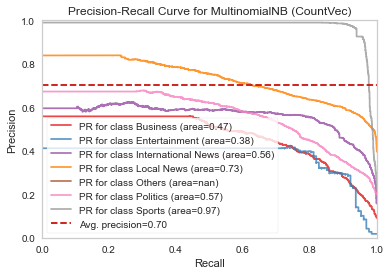

In [105]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [106]:
store_result(method_name, feature, y_test, y_pred, viz)

## Logistic  Regression

In [107]:
method_name = 'LogisticReg CntVec'

In [108]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7963484510051472

In [109]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

LogisticReg CntVec
[[ 410    5   11  264  109    3]
 [   3   83    3   35    1    2]
 [  10    2 1045  217   32   17]
 [ 117   17  175 3441  281   41]
 [  79    9   78  500 1204    8]
 [   1    1    8   67    1 2017]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.66      0.51      0.58       802
     Entertainment       0.71      0.65      0.68       127
International News       0.79      0.79      0.79      1323
        Local News       0.76      0.85      0.80      4072
          Politics       0.74      0.64      0.69      1878
            Sports       0.97      0.96      0.96      2095

          accuracy                           0.80     10297
         macro avg       0.77      0.73      0.75     10297
      weighted avg       0.79      0.80      0.79     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.75      0.60      0.66      3092
     Entertainment       0.99      0.96

In [110]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.790706
test_precision-neg    0.647650
test_recall-neg       0.507127
test_f1-neg           0.568374
dtype: float64

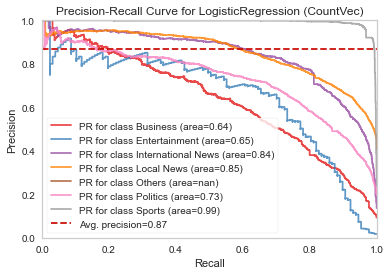

In [111]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [112]:
store_result(method_name, feature, y_test, y_pred, viz)

## SVM

In [113]:
method_name = 'SVM CntVec'

In [114]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7909099737787705

In [115]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

SVM CntVec
[[ 390    5   13  276    0  113    5]
 [   1   80    3   39    0    2    2]
 [   8    2 1026  239    0   36   12]
 [  91   15  170 3458    1  300   37]
 [   0    0    0    0    0    0    0]
 [  79   11   77  519    0 1184    8]
 [   0    0    9   80    0    0 2006]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.69      0.49      0.57       802
     Entertainment       0.71      0.63      0.67       127
International News       0.79      0.78      0.78      1323
        Local News       0.75      0.85      0.80      4072
            Others       0.00      0.00      0.00         0
          Politics       0.72      0.63      0.67      1878
            Sports       0.97      0.96      0.96      2095

          accuracy                           0.79     10297
         macro avg       0.66      0.62      0.64     10297
      weighted avg       0.79      0.79      0.79     10297

Train_Set
                    precision    recall 

In [116]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.792769
test_precision-neg    0.681324
test_recall-neg       0.491926
test_f1-neg           0.570940
dtype: float64

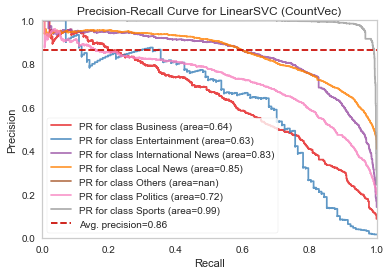

In [117]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    title="Precision-Recall Curve for LinearSVC (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [118]:
store_result(method_name, feature, y_test, y_pred, viz)

## Random Forest

In [119]:
method_name = 'RandomForest CntVec'

In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7854714965523939

In [121]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

RandomForest CntVec
[[ 288    1    9  389  113    2]
 [   0   40    0   84    0    3]
 [   2    1  930  348   31   11]
 [  43    1  101 3673  224   30]
 [  41    3   54  620 1157    3]
 [   0    0    1   93    1 2000]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.77      0.36      0.49       802
     Entertainment       0.87      0.31      0.46       127
International News       0.85      0.70      0.77      1323
        Local News       0.71      0.90      0.79      4072
          Politics       0.76      0.62      0.68      1878
            Sports       0.98      0.95      0.97      2095

          accuracy                           0.79     10297
         macro avg       0.82      0.64      0.69     10297
      weighted avg       0.80      0.79      0.78     10297

Train_Set
                    precision    recall  f1-score   support

          Business       1.00      0.92      0.96      3092
     Entertainment       1.00      0.9

In [122]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.781576
test_precision-neg    0.757310
test_recall-neg       0.348957
test_f1-neg           0.477541
dtype: float64

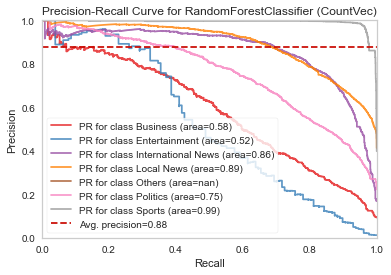

In [123]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [124]:
store_result(method_name, feature, y_test, y_pred, viz)

## Adaboost

In [125]:
method_name = 'Adaboost CntVec'

In [126]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.31504321647081673

In [127]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Adaboost CntVec
[[   0  291    0  465   46    0]
 [   0  116    0   11    0    0]
 [   0  247    0 1004   67    5]
 [   0 1497    0 2426  144    5]
 [   0  656    0 1143   79    0]
 [   0  710    0  739   23  623]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.00      0.00      0.00       802
     Entertainment       0.03      0.91      0.06       127
International News       0.00      0.00      0.00      1323
        Local News       0.42      0.60      0.49      4072
          Politics       0.22      0.04      0.07      1878
            Sports       0.98      0.30      0.46      2095

          accuracy                           0.32     10297
         macro avg       0.28      0.31      0.18     10297
      weighted avg       0.41      0.32      0.30     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.00      0.00      0.00      3092
     Entertainment       0.03      0.94   

In [128]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.383476
test_precision-neg    0.069055
test_recall-neg       0.053560
test_f1-neg           0.051692
dtype: float64

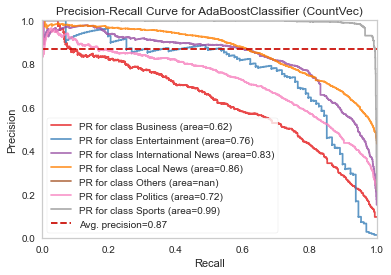

In [129]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);
# plt.savefig(path)

In [130]:
store_result(method_name, feature, y_test, y_pred, viz)

## XGBoost

In [131]:
method_name = 'XGBoost CntVec'

In [132]:
Y

array(['Politics', 'Local News', 'Local News', ..., 'Local News',
       'Sports', 'Local News'], dtype=object)

In [133]:
np.unique(Y)

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype=object)

In [134]:
d_replace = { "Business": 0,
         "Entertainment": 1,
    "International News": 2,
            "Local News": 3,
              "Politics": 4,
                "Sports": 5,
                "Others": 6 }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4, 5, 6])

In [135]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , test_size=0.2, random_state=42)

In [137]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[20:15:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8254831504321647

In [138]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost CntVec
[[ 449    1   10  226  114    2]
 [   1   85    3   36    1    1]
 [   8    1 1046  220   39    9]
 [ 101    4  123 3553  265   26]
 [  82   11   56  375 1352    2]
 [   1    0    3   76    0 2015]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       802
           1       0.83      0.67      0.74       127
           2       0.84      0.79      0.82      1323
           3       0.79      0.87      0.83      4072
           4       0.76      0.72      0.74      1878
           5       0.98      0.96      0.97      2095

    accuracy                           0.83     10297
   macro avg       0.82      0.76      0.79     10297
weighted avg       0.82      0.83      0.82     10297

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      3092
           1       1.00      0.99      1.00       508
           2       0.89      0.90      0.90      5220
       

We have an overfitting here. The result of test set is lower than train set. Accuracy has 10 percent difference which means overfitting.

In [170]:
from sklearn.model_selection import GridSearchCV

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}


param_grid = {"n_estimators":[50, 100, 200],
             'max_depth':[3,4,5], 
             "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], 
             "colsample_bytree":[0.5,0.7, 1]}

xgb_model = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid=param_grid, scoring=scoring, refit=False, verbose=2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [139]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = XGBClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[20:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_accuracy        NaN
test_precision-neg   NaN
test_recall-neg      NaN
test_f1-neg          NaN
dtype: float64

[21:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:05:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

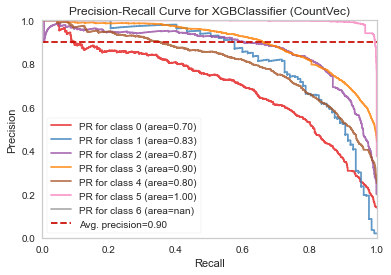

In [140]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [164]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [159]:
f1_score(y_test, y_pred, labels=[feature], average=None)[0]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
store_result(method_name, feature, y_test, y_pred, viz)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['Politics', 'Local News', 'Local News', ..., 'Local News',
        'Sports', 'Local News'], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [ ]:
method_name = "GaussianNB TF-iDF"

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6222200640963388

In [ ]:
print_eval(method_name, classifier,X_train, X_test, y_train, y_test)

GaussianNB TF-iDF
[[ 656   15   12   35   11   73    0]
 [   6  106    8    3    0    3    1]
 [  69   64  996   51   10  118   15]
 [ 984  172  386 1411   33 1066   20]
 [   0    0    0    0    0    0    0]
 [ 309   24  197   56   23 1265    4]
 [   5   20   26   32   36    3 1973]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.32      0.82      0.46       802
     Entertainment       0.26      0.83      0.40       127
International News       0.61      0.75      0.68      1323
        Local News       0.89      0.35      0.50      4072
            Others       0.00      0.00      0.00         0
          Politics       0.50      0.67      0.57      1878
            Sports       0.98      0.94      0.96      2095

          accuracy                           0.62     10297
         macro avg       0.51      0.62      0.51     10297
      weighted avg       0.75      0.62      0.63     10297

Train_Set
                    precision    

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = GaussianNB()
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.620017
test_precision-neg    0.312099
test_recall-neg       0.808219
test_f1-neg           0.450150
dtype: float64

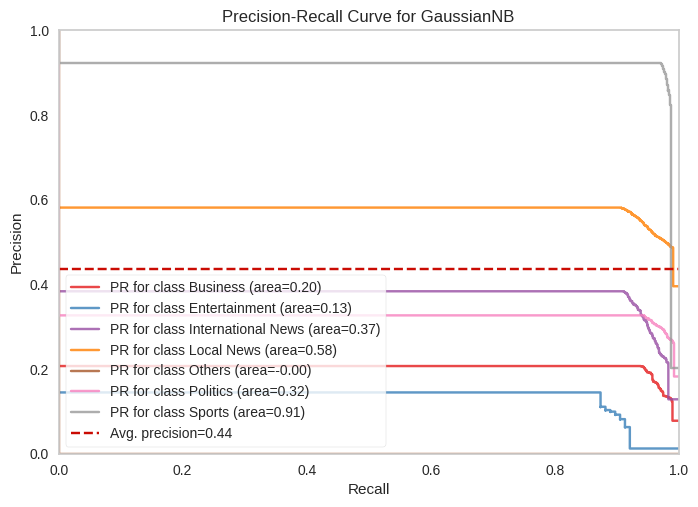

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    title="Precision-Recall Curve for GaussianNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## Multinomial NB

In [ ]:
method_name = 'MultinomialNB TF-iDF'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7355540448674371

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

MultinomialNB TF-iDF
[[ 382    8    5  344   63    0]
 [   2   60    3   59    1    2]
 [  27    4  778  408   78   28]
 [ 138   14   89 3461  348   22]
 [  78   10  145  694  948    3]
 [   2    6   10  122   10 1945]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.61      0.48      0.53       802
     Entertainment       0.59      0.47      0.52       127
International News       0.76      0.59      0.66      1323
        Local News       0.68      0.85      0.76      4072
          Politics       0.65      0.50      0.57      1878
            Sports       0.97      0.93      0.95      2095

          accuracy                           0.74     10297
         macro avg       0.71      0.64      0.67     10297
      weighted avg       0.74      0.74      0.73     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.59      0.47      0.52      3092
     Entertainment       0.66      0.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.731608
test_precision-neg    0.580904
test_recall-neg       0.459565
test_f1-neg           0.512811
dtype: float64

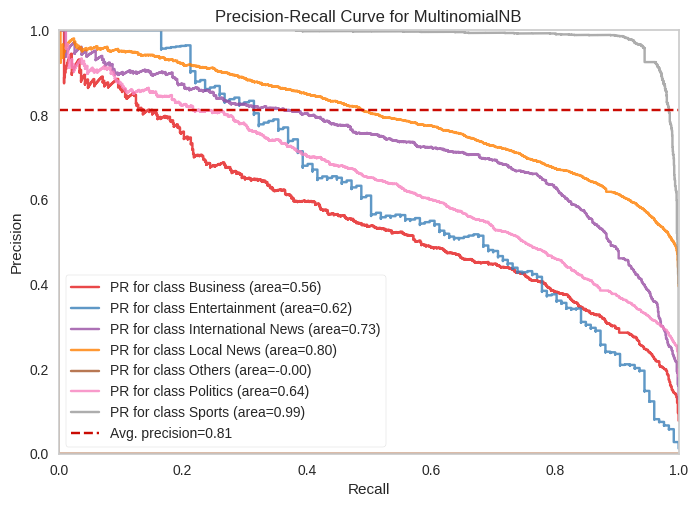

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## Logistic  Regression

In [ ]:
method_name = 'LogisticReg TF-iDF'

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7933378653976887

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

LogisticReg TF-iDF
[[ 418    4    6  274   99    1]
 [   2   65    2   58    0    0]
 [  14    3  994  246   49   17]
 [ 100    9  123 3483  327   30]
 [  80    9   77  514 1193    5]
 [   2    2    5   67    3 2016]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.68      0.52      0.59       802
     Entertainment       0.71      0.51      0.59       127
International News       0.82      0.75      0.79      1323
        Local News       0.75      0.86      0.80      4072
          Politics       0.71      0.64      0.67      1878
            Sports       0.97      0.96      0.97      2095

          accuracy                           0.79     10297
         macro avg       0.77      0.71      0.73     10297
      weighted avg       0.79      0.79      0.79     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.69      0.54      0.61      3092
     Entertainment       0.77      0.55

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.790098
test_precision-neg    0.660282
test_recall-neg       0.499677
test_f1-neg           0.568465
dtype: float64

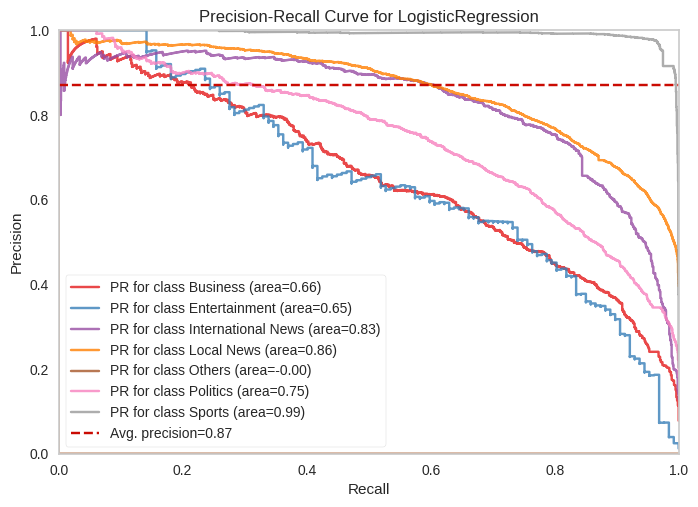

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## SVM

In [ ]:
method_name = 'SVM TF-iDF'

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7934349810624454

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

SVM TF-iDF
[[ 410    2    6  280  102    2]
 [   3   70    3   51    0    0]
 [  15    1 1006  228   54   19]
 [  97    7  145 3455  332   36]
 [  70   10   77  502 1213    6]
 [   1    1    5   69    3 2016]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.69      0.51      0.59       802
     Entertainment       0.77      0.55      0.64       127
International News       0.81      0.76      0.78      1323
        Local News       0.75      0.85      0.80      4072
          Politics       0.71      0.65      0.68      1878
            Sports       0.97      0.96      0.97      2095

          accuracy                           0.79     10297
         macro avg       0.78      0.71      0.74     10297
      weighted avg       0.79      0.79      0.79     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.71      0.54      0.61      3092
     Entertainment       0.84      0.59      0.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.792308
test_precision-neg    0.669979
test_recall-neg       0.505497
test_f1-neg           0.575921
dtype: float64

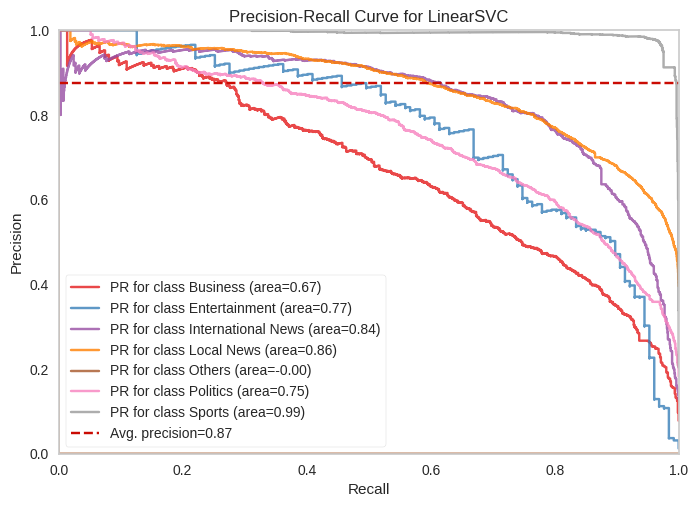

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    title="Precision-Recall Curve for LinearSVC (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## Random Forest

In [ ]:
method_name = 'RandomForest TF-iDF'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7789647470136933

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

RandomForest TF-iDF
[[ 269    0    6  411  113    3]
 [   1   33    0   89    0    4]
 [   3    0  910  367   33   10]
 [  53    0  110 3647  230   32]
 [  42    1   52  622 1159    2]
 [   0    0    1   90    1 2003]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.73      0.34      0.46       802
     Entertainment       0.97      0.26      0.41       127
International News       0.84      0.69      0.76      1323
        Local News       0.70      0.90      0.78      4072
          Politics       0.75      0.62      0.68      1878
            Sports       0.98      0.96      0.97      2095

          accuracy                           0.78     10297
         macro avg       0.83      0.63      0.68     10297
      weighted avg       0.79      0.78      0.77     10297

Train_Set
                    precision    recall  f1-score   support

          Business       1.00      0.94      0.97      3092
     Entertainment       1.00      0.9

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.777521
test_precision-neg    0.761321
test_recall-neg       0.337964
test_f1-neg           0.467776
dtype: float64

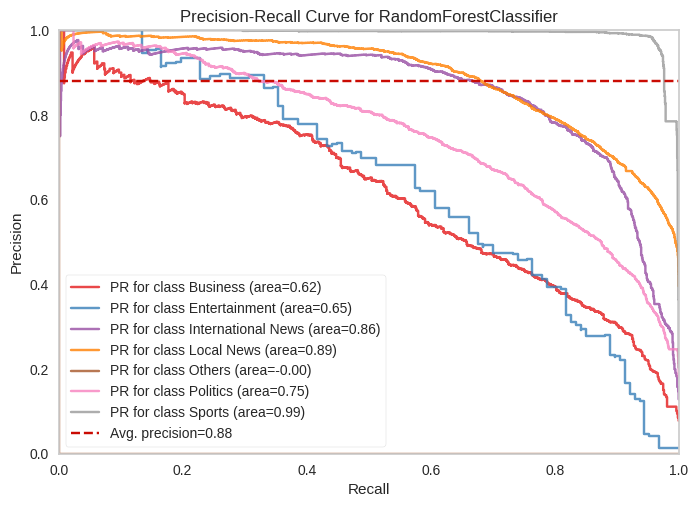

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## Adaboost

In [ ]:
method_name = 'Adaboost TF-iDF'

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.44391570360299115

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Adaboost TF-iDF
[[   0   47    8  746    0    1]
 [   0   90    0   36    0    1]
 [   0  135    5 1177    0    6]
 [   0  579    7 3472    0   14]
 [   0  118    6 1754    0    0]
 [   0  153    0  938    0 1004]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.00      0.00      0.00       802
     Entertainment       0.08      0.71      0.14       127
International News       0.19      0.00      0.01      1323
        Local News       0.43      0.85      0.57      4072
          Politics       0.00      0.00      0.00      1878
            Sports       0.98      0.48      0.64      2095

          accuracy                           0.44     10297
         macro avg       0.28      0.34      0.23     10297
      weighted avg       0.39      0.44      0.36     10297

Train_Set
                    precision    recall  f1-score   support

          Business       0.00      0.00      0.00      3092
     Entertainment       0.09      0.78   

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.464526
test_precision-neg    0.050628
test_recall-neg       0.053229
test_f1-neg           0.043636
dtype: float64

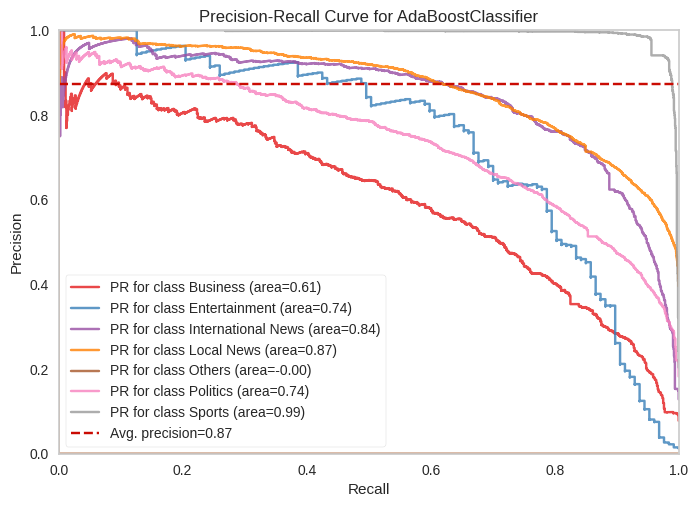

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## XGBoost

In [ ]:
method_name = 'XGBoost TF-iDF'

In [ ]:
Y

array(['Politics', 'Local News', 'Local News', ..., 'Local News',
       'Sports', 'Local News'], dtype=object)

In [ ]:
np.unique(Y)

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype=object)

In [ ]:
d_replace = { "Business": 0,
         "Entertainment": 1,
    "International News": 2,
            "Local News": 3,
              "Politics": 4,
                "Sports": 5,
                "Others": 6 }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8239292997960571

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost TF-iDF
[[ 454    1    8  226  111    2]
 [   2   87    2   36    0    0]
 [  10    1 1052  217   36    7]
 [ 102    8  136 3527  272   27]
 [  73    7   52  397 1346    3]
 [   1    2    3   69    2 2018]]
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       802
           1       0.82      0.69      0.75       127
           2       0.84      0.80      0.82      1323
           3       0.79      0.87      0.83      4072
           4       0.76      0.72      0.74      1878
           5       0.98      0.96      0.97      2095

    accuracy                           0.82     10297
   macro avg       0.82      0.77      0.79     10297
weighted avg       0.82      0.82      0.82     10297

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3092
           1       1.00      1.00      1.00       508
           2       0.92      0.93      0.92      5220
       

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = XGBClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.819429
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

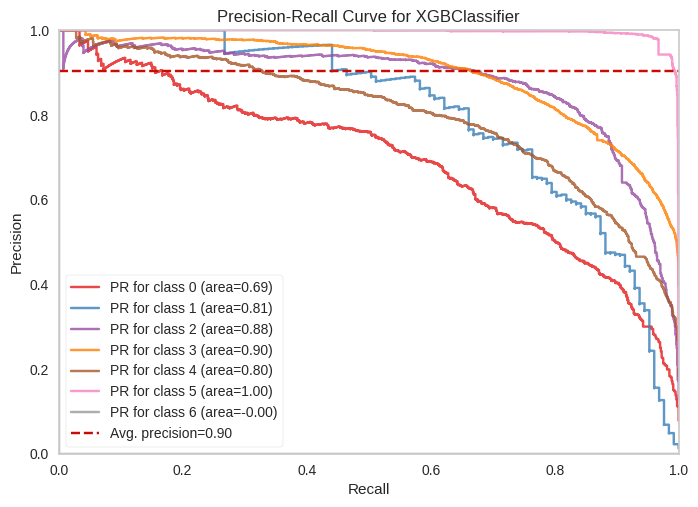

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

NameError: ignored

# Models Comparison

In [ ]:
results_df = read_results()
results_df

In [ ]:
def labels(ax):                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(7,10))

plt.subplot(311)
results_df = results_df.sort_values(by="Recall_score", ascending=False)
ax=sns.barplot(x="Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
ax.set_title("Performances for feature:" + feature)

plt.subplot(312)
results_df = results_df.sort_values(by="F1_score", ascending=False)
ax=sns.barplot(x="F1_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)

plt.subplot(313)
results_df = results_df.sort_values(by="Prec_Recall_score", ascending=False)
ax=sns.barplot(x="Prec_Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
# ax.set_title('subplot 1')


plt.show();